In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# Dataframe formating
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.rcParams["figure.figsize"] = (20,3)
pd.set_option('display.max_rows', None)

In [3]:
hours = {
    '09AM': '-9:00 AM',
    '12AM': '-12:00 PM',
    '15PM': '-15:00 PM',
    '18PM': '-18:00 PM'
}

### GFS comparison

In [4]:
GFS_stock_files = sorted(glob('./comparision data/Comparación Enero/**-Enero-2021-GFS'))

In [5]:
GFS_jan_04_to_31_comparission = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in GFS_stock_files), ignore_index=True)
GFS_jan_04_to_31_comparission

,real_data,forecasted_data,filename
0,15694.55000,19200.30067,./comparision data/Comparación Enero/04-Enero-...
1,34858.23000,44195.65396,./comparision data/Comparación Enero/04-Enero-...
2,27938.45000,37875.52388,./comparision data/Comparación Enero/04-Enero-...
3,733.11000,1124.32531,./comparision data/Comparación Enero/04-Enero-...
4,14834.23000,18988.82644,./comparision data/Comparación Enero/05-Enero-...
5,33621.44000,44064.56659,./comparision data/Comparación Enero/05-Enero-...
6,28274.22000,37885.16159,./comparision data/Comparación Enero/05-Enero-...
7,913.67000,1196.09331,./comparision data/Comparación Enero/05-Enero-...
8,15672.77000,18867.83505,./comparision data/Comparación Enero/06-Enero-...
9,31720.23000,43306.82639,./comparision data/Comparación Enero/06-Enero-...


In [6]:
# Get dates for every file in order to add them in the dataframe
dates = [GFS_jan_04_to_31_comparission['filename'][indx].split('/')[-1:][0] for indx in GFS_jan_04_to_31_comparission.index]

In [7]:
# Logic in order to add add the hour for every record meassured
for x in range(0, len(dates), 4):
    dates[x] = dates[x] + hours['09AM']
    dates[x + 1] = dates[x + 1] + hours['12AM']
    dates[x + 2] = dates[x + 2] + hours['15PM']
    dates[x + 3] = dates[x + 3] + hours['18PM']

In [8]:
# Add dates into dataFrame 
GFS_jan_04_to_31_comparission['Date'] = dates

Text(0.5, 1.0, 'Comparision Between Pvlib GFS and PV Cutonala from January 04 to 31')

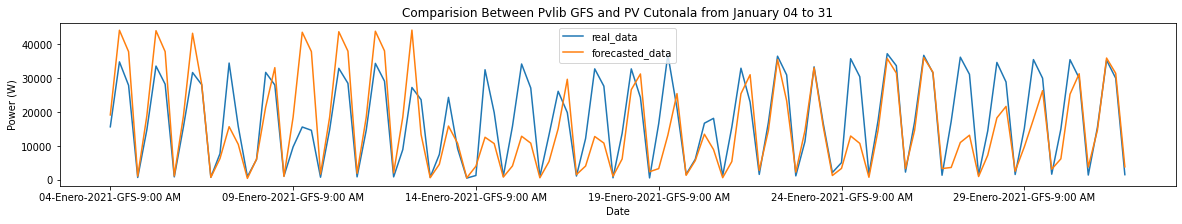

In [9]:
# Plot the dataframe with date column as index for x label
GFS_jan_04_to_31_comparission.set_index('Date').plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib GFS and PV Cutonala from January 04 to 31')

In [10]:
# For each day, I've calculated the MSE, RMSE, MSLE, RMSLE, MAE,
# and stored on its own file
GFS_metrics_stock_files = sorted(glob('./comparision data/Comparación Enero/**-Enero-2021-GFS-Metrics'))

In [11]:
# Calculate the MSE, RMSE, MSLE, RMSLE, MAE, for all the Metrics files
GFS_metrics_jan_04_to_31 = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in GFS_metrics_stock_files), ignore_index=True)

In [12]:
# statistician data
GFS_metrics_jan_04_to_31.describe().round(1)

,MSE,RMSE,MSLE,RMSLE,MAE
count,28.00000,28.00000,28.00000,28.00000,28.00000
mean,90512307.40000,8332.30000,0.40000,0.60000,6649.10000
std,91300039.30000,4676.20000,0.30000,0.30000,3835.60000
min,2122318.10000,1456.80000,0.00000,0.20000,1303.70000
25%,30522228.00000,5513.40000,0.10000,0.40000,3653.30000
50%,55062749.20000,7420.40000,0.30000,0.50000,6190.40000
75%,121276535.10000,11012.50000,0.70000,0.80000,8327.30000
max,350022431.30000,18708.90000,1.20000,1.10000,15229.80000


### NAM comparison

In [13]:
# Files for the comparision made between real data and NAM model
NAM_stock_files = sorted(glob('./comparision data/Comparación Enero/**-Enero-2021-NAM'))

In [14]:
NAM_jan_04_to_31_comparission = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in NAM_stock_files), ignore_index=True)
NAM_jan_04_to_31_comparission

,real_data,forecasted_data,filename
0,15694.55000,19482.84900,./comparision data/Comparación Enero/04-Enero-...
1,34858.23000,45301.79758,./comparision data/Comparación Enero/04-Enero-...
2,27938.45000,38468.59621,./comparision data/Comparación Enero/04-Enero-...
3,733.11000,1146.19686,./comparision data/Comparación Enero/04-Enero-...
4,14834.23000,19342.84504,./comparision data/Comparación Enero/05-Enero-...
5,33621.44000,45027.39003,./comparision data/Comparación Enero/05-Enero-...
6,28274.22000,38344.30473,./comparision data/Comparación Enero/05-Enero-...
7,913.67000,1209.75086,./comparision data/Comparación Enero/05-Enero-...
8,15672.77000,19088.57905,./comparision data/Comparación Enero/06-Enero-...
9,31720.23000,44777.96408,./comparision data/Comparación Enero/06-Enero-...


In [15]:
# Get dates for every file in order to add them in the dataframe
dates = [NAM_jan_04_to_31_comparission['filename'][indx].split('/')[-1:][0] for indx in NAM_jan_04_to_31_comparission.index]

In [16]:
# Logic in order to add add the hour for every record meassured
for x in range(0, len(dates), 4):
    dates[x] = dates[x] + hours['09AM']
    dates[x + 1] = dates[x + 1] + hours['12AM']
    dates[x + 2] = dates[x + 2] + hours['15PM']
    dates[x + 3] = dates[x + 3] + hours['18PM']

In [17]:
NAM_jan_04_to_31_comparission['Date'] = dates

Text(0.5, 1.0, 'Comparision Between Pvlib NAM and PV Cutonala from January 04 to 31')

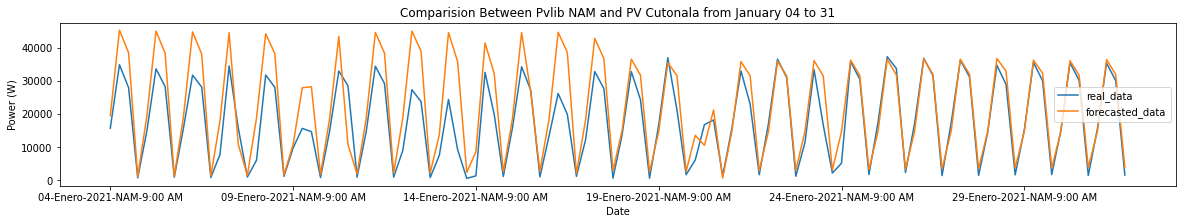

In [18]:
NAM_jan_04_to_31_comparission.set_index('Date').plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib NAM and PV Cutonala from January 04 to 31')

In [19]:
NAM_metrics_stock_files = sorted(glob('./comparision data/Comparación Enero/**-Enero-2021-NAM-Metrics'))

In [20]:
NAM_metrics_jan_04_to_31 = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in NAM_metrics_stock_files), ignore_index=True)

In [21]:
NAM_metrics_jan_04_to_31.describe()

,MSE,RMSE,MSLE,RMSLE,MAE
count,28.00000,28.00000,28.00000,28.00000,28.00000
mean,56663235.52326,6379.52440,0.31859,0.52584,5187.00392
std,65434903.01984,4068.93065,0.27374,0.20891,3367.96808
min,2133298.08698,1460.58142,0.04035,0.20088,1210.72593
25%,5437910.13528,2312.15282,0.15186,0.38968,1982.86129
50%,40318557.24433,6289.10779,0.22423,0.47342,4876.98562
75%,70554917.12881,8399.66865,0.38475,0.62024,6859.20284
max,289084053.13224,17002.47197,1.16687,1.08022,13705.69002


### RAP comparison

In [22]:
# Files for the comparision made between real data and NAM model
RAP_stock_files = sorted(glob('./comparision data/Comparación Enero/**-Enero-2021-RAP'))

In [23]:
RAP_jan_04_to_31_comparission = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in RAP_stock_files), ignore_index=True)
RAP_jan_04_to_31_comparission

,real_data,forecasted_data,filename
0,15694.55000,19480.47543,./comparision data/Comparación Enero/04-Enero-...
1,34858.23000,45261.32103,./comparision data/Comparación Enero/04-Enero-...
2,27938.45000,38803.62762,./comparision data/Comparación Enero/04-Enero-...
3,733.11000,1164.04924,./comparision data/Comparación Enero/04-Enero-...
4,14834.23000,19267.83405,./comparision data/Comparación Enero/05-Enero-...
5,33621.44000,45002.16211,./comparision data/Comparación Enero/05-Enero-...
6,28274.22000,38518.08493,./comparision data/Comparación Enero/05-Enero-...
7,913.67000,1226.81208,./comparision data/Comparación Enero/05-Enero-...
8,15672.77000,18617.41969,./comparision data/Comparación Enero/06-Enero-...
9,31720.23000,41613.17195,./comparision data/Comparación Enero/06-Enero-...


In [24]:
# Get dates for every file in order to add them in the dataframe
dates = [RAP_jan_04_to_31_comparission['filename'][indx].split('/')[-1:][0] for indx in RAP_jan_04_to_31_comparission.index]

In [25]:
for x in range(0, len(dates), 4):
    dates[x] = dates[x] + hours['09AM']
    dates[x + 1] = dates[x + 1] + hours['12AM']
    dates[x + 2] = dates[x + 2] + hours['15PM']
    dates[x + 3] = dates[x + 3] + hours['18PM']

In [26]:
RAP_jan_04_to_31_comparission['Date'] = dates

Text(0.5, 1.0, 'Comparision Between Pvlib RAP and PV Cutonala from January 04 to 31')

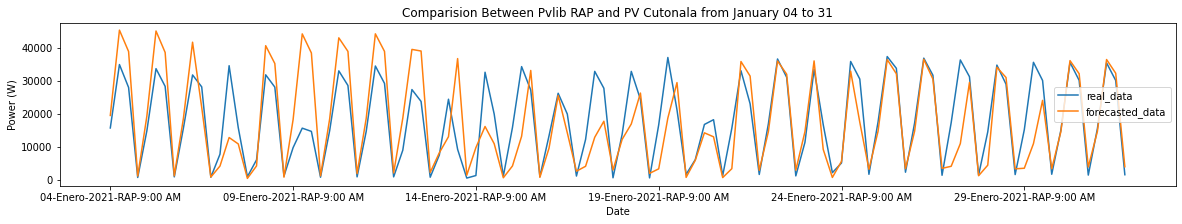

In [27]:
RAP_jan_04_to_31_comparission.set_index('Date').plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib RAP and PV Cutonala from January 04 to 31')

In [28]:
RAP_metrics_stock_files = sorted(glob('./comparision data/Comparación Enero/**-Enero-2021-RAP-Metrics'))

In [29]:
RAP_metrics_jan_04_to_31 = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in RAP_metrics_stock_files), ignore_index=True)

In [30]:
RAP_metrics_jan_04_to_31.describe()

,MSE,RMSE,MSLE,RMSLE,MAE
count,28.00000,28.00000,28.00000,28.00000,28.00000
mean,82829284.10850,7844.37147,0.45038,0.61598,6159.34785
std,85895403.14998,4699.34341,0.35996,0.27124,3641.99950
min,2432796.54114,1559.74246,0.04198,0.20488,1355.63804
25%,17129464.52121,4122.92612,0.18420,0.42918,3434.34109
50%,55977318.74735,7481.39795,0.31989,0.56142,6138.88321
75%,130834479.80874,11434.99097,0.68865,0.82985,9642.45255
max,361263346.97783,19006.92892,1.28716,1.13453,15266.02886
